In [1]:
#85. Obtaining the Efficient Frontier in Python – Part I

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib inline
#facilitates plotting matplotlib graphs just below code cellds and storing them in the notebook document

In [3]:
assets = ['PG','^GSPC']
pf_data= pd.DataFrame()

for a in assets:
	pf_data[a]= wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']


In [4]:
pf_data.tail()


,PG,^GSPC
Date,,
2020-07-20,124.454643,3251.840088
2020-07-21,124.285706,3257.300049
2020-07-22,125.348999,3276.020020
2020-07-23,126.160004,3235.659912
2020-07-24,125.959999,3215.629883


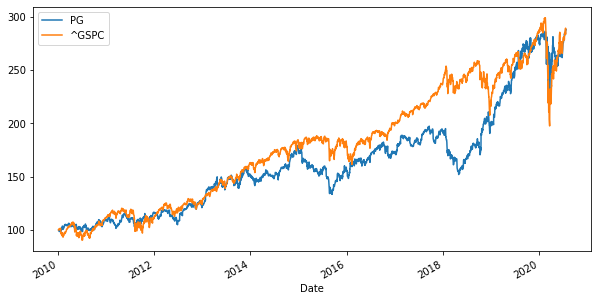

In [5]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [6]:
log_returns= np.log(pf_data / pf_data.shift(1))


In [7]:
log_returns.mean()*250

PG       0.099429
^GSPC    0.098152
dtype: float64

In [8]:
log_returns.cov()*250

,PG,^GSPC
PG,0.029484,0.017991
^GSPC,0.017991,0.030668


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.598314
^GSPC,0.598314,1.000000


In [10]:
num_assets = len(assets)

#careate a variable that will carry the number of asset in our portfoli, use in our formulas the can response to the change in number of asset that #compse the portfolio. It will == the elements in the asset list. Get the number with help of the len function

In [11]:
num_assets

2

In [12]:
arr= np.random.random(2)
arr
#Now create 2 random weights np.random.random(2) which the random will start at 0 and ends at 1.
 


array([0.6589035 , 0.14371091])

In [13]:
arr[0] + arr[1]

#combine the value weights of the 2 arrays to see the sum.
#Must make the wright == 1.

0.8026144129916732

In [14]:

weights= np.random.random(num_assets)
weights/=np.sum(weights)
weights


# Line 1 assign 2 random numbers between 0 and 1 to the new numpy array call weights
# Line 2 add a line of code that comes afterward, loop section introduct incrementing. w/=np.sum(weights) 
# w=/sum (w). w is an array, w = (w1)/(w1+w2) + w2/(w1+w2) = w1+w2/w1+w2 = 1

array([0.88336001, 0.11663999])

In [15]:
weights[0] + weights [1]


1.0

In [16]:
#Calculate Expected Portfolio return

In [17]:
np.sum(weights* log_returns.mean())*250

0.09928003081178531

In [18]:
np.dot(weights.T,np.dot(log_returns.cov() *250, weights)) # Expected porfolio Variance


0.027132096109364758

In [19]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights))) # Expected portfolio Volatility

0.16471823247401837

In [20]:
# Not We are not considering 1000 different investments
# We are considering 1000 different weight combinations of the same assets!
# E.g. 'PG' 1% and '^GSPC' 99% vice versa

In [21]:
# E.g. 'PG' 1% and '^GSPC' 99% vice versa hypertrophical. 2 Object to store this data will be needed.

# starts with an empty list we inten to fill it with randomly generated expected returns. Apply the same instruction for the portfolio volilities.

pfolio_returns= []
pfolio_volatilites=[]

for x in range (1000): #for x in range (1000): #need a loop that will be repeated 1000 times
    weights = np.random.random(num_assets)
    weights/=np.sum(weights)
    #In the loop of the body we will random generate 2 weight which sum equals 1. Need 2 weights since is a 2 weight pfolio asset.
    #The  apen method that will add each newly generated return value to the list portfolio returns, this operation will be repeated for each part of the #loop until unitill the porfolio list accumulate 1000 observations
    #since calculaing furture epxected portfolio returns, enter the formula in ()
    pfolio_returns.append(np.sum(weights *log_returns.mean())*250)
    #use .append apply the formula to standard deviation 
    pfolio_volatilites.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns, pfolio_volatilites

([0.09929413878004736,
  0.09905689291810413,
  0.09864908741618438,
  0.09847520652487465,
  0.09858116461711297,
  0.09876459165222677,
  0.09876379340824457,
  0.09896620972870296,
  0.09873964572700836,
  0.09890258741096236,
  0.09894940053317333,
  0.09872629812705037,
  0.09874053735925897,
  0.09871295134600039,
  0.09836140005102167,
  0.0987034256932554,
  0.09860971623174111,
  0.09907065693447144,
  0.09890220371520754,
  0.09837330403847729,
  0.09869458557462193,
  0.09847758880734929,
  0.09858089320964353,
  0.09854087523954251,
  0.0986466078649232,
  0.09873305222957544,
  0.09867501563422769,
  0.09873840549864757,
  0.0987161961666541,
  0.09899257528051618,
  0.09941880196309356,
  0.09822669997780768,
  0.09872128712132565,
  0.09844530402662993,
  0.09880846846434967,
  0.09854913457519647,
  0.09861487268491743,
  0.09864704788613861,
  0.09861310331021914,
  0.09898791405697598,
  0.09884838018888518,
  0.09890851755558924,
  0.09891249336281582,
  0.0984430436

In [22]:
# convert the list into numpy arrays. The arrary are call the same names
# The syntax is intuitive

pfolio_returns= []
pfolio_volatilities = []

for x in range (1000):
    weights =np.random.random(num_assets)
    weights/=np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights))))

pfolio_returns= np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09865095, 0.09938894, 0.09930687, 0.09902728, 0.09859481,
        0.09862968, 0.09830993, 0.09844996, 0.09895429, 0.09885529,
        0.09861243, 0.09876708, 0.09824809, 0.09839303, 0.09908428,
        0.09879895, 0.09839412, 0.09818294, 0.09851856, 0.09881447,
        0.09890898, 0.0990335 , 0.09904269, 0.09866703, 0.0989832 ,
        0.09861247, 0.09898225, 0.09917698, 0.09868868, 0.09873677,
        0.09852565, 0.09895638, 0.09893562, 0.09866722, 0.09826352,
        0.09887701, 0.09918955, 0.09877063, 0.09908029, 0.09893091,
        0.09892977, 0.09901888, 0.09910926, 0.09867426, 0.09866477,
        0.09923289, 0.09850763, 0.09931923, 0.09904036, 0.09822089,
        0.09860747, 0.09889229, 0.09877456, 0.09852011, 0.09899547,
        0.0990265 , 0.09904463, 0.09884351, 0.09889242, 0.09820941,
        0.09930329, 0.0982441 , 0.09865676, 0.09868311, 0.09870705,
        0.09890998, 0.09850001, 0.09887075, 0.09842496, 0.09888922,
        0.0988885 , 0.09837698, 0.09891437, 0.09

In [23]:
portfolios= pd.DataFrame({'Return': pfolio_returns, 'volatility': pfolio_volatilities})
#{} dictionary use DataFrame Column. It will constitude value pairs and will fill in the columns 

In [24]:
portfolios.head()

,Return,volatility
0,0.098651,0.156374
1,0.099389,0.169670
2,0.099307,0.165854
3,0.099027,0.156987
4,0.098595,0.157430


In [25]:
portfolios.tail()

,Return,volatility
995,0.098972,0.156059
996,0.099338,0.167226
997,0.098505,0.159721
998,0.099387,0.169582
999,0.098829,0.154984


Text(0, 0.5, 'Expected Return')

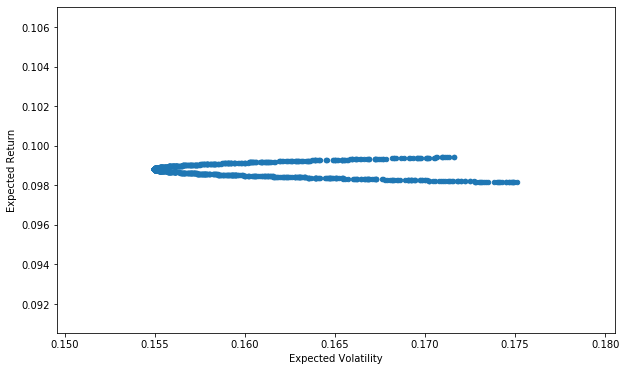

In [26]:
portfolios.plot(x='volatility', y = 'Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
